In [9]:
import covasim as cv
import matplotlib as mpl
import matplotlib.pyplot as plt
import pylab as pl
import sciris as sc
import numpy as np

In [10]:
def dem_vaccinate(sim):
  ppl     = sim.people
  pop     = len(ppl)
  ten     = np.logical_and(ppl.age > 10, ppl.age <= 20)
  twenty  = np.logical_and(ppl.age > 20, ppl.age <= 30)
  thirty  = np.logical_and(ppl.age > 30, ppl.age <= 40)
  fourty  = np.logical_and(ppl.age > 40, ppl.age <= 50)
  fifty   = np.logical_and(ppl.age > 50, ppl.age <= 60)
  sixty   = np.logical_and(ppl.age > 60, ppl.age <= 70)
  seventy = np.logical_and(ppl.age > 70, ppl.age <= 80)
  eighty  = ppl.age > 80
  male    = ppl.sex == 1
  female  = ppl.sex == 0

  num_symp     = np.sum(ppl.symptomatic)
  num_severe   = np.sum(ppl.severe)
  num_critical = np.sum(ppl.critical)
  num_dead     = np.sum(ppl.dead)

  norms   = np.random.normal(loc=1,scale=0.5,size=len(ppl))
  x       = (num_severe + num_critical + num_dead + num_symp)

  inds = np.array(sim.people.uid)

  sexs = np.array(sim.people.sex)
  sexs = np.where(male,1.41,sexs)
  sexs = np.where(female,1,sexs)

  ages = np.array(sim.people.age)
  ages = np.where(ten,0.55,ages)
  ages = np.where(twenty,0.6,ages)
  ages = np.where(thirty,0.65,ages)
  ages = np.where(fourty,0.7,ages)
  ages = np.where(fifty,0.75,ages)
  ages = np.where(sixty,0.80,ages)
  ages = np.where(seventy,0.85,ages)
  ages = np.where(eighty,0.9,ages)

  contacts_h = np.bincount(ppl.contacts[0][0])
  h_array    = np.pad(contacts_h,(0,len(inds)-len(contacts_h)),mode='constant')

  contacts_s = np.bincount(ppl.contacts[1][0])
  s_array    = np.pad(contacts_s, (0,len(inds)-len(contacts_s)),mode='constant')

  contacts_w = np.bincount(ppl.contacts[2][0])
  w_array    = np.pad(contacts_w, (0,len(inds)-len(contacts_w)),mode='constant')

  contacts_c = np.bincount(ppl.contacts[3][0])
  c_array    = np.pad(contacts_c,(0,len(inds)-len(contacts_c)),mode='constant')

  contacts   = h_array + s_array + w_array + c_array

  vals = sexs*((np.exp((0.0001*contacts)+(norms*ages)*(x/pop)-(0.0001*sim.t))/(1+np.exp((0.0001*contacts)+(norms*ages)*(x/pop)-(0.0001*sim.t))))-0.5)
  vals = np.clip(vals,0.0,0.5)

  vaccinated = np.random.binomial(1,p=vals,size=len(vals))
  global vacc_num
  vacc_num   = np.sum(vaccinated)
  global vacc_inds
  vacc_inds  = np.where(vaccinated)[0]
  return vacc_num

def vacc_subtarget(sim):
  vacc_dict  = dict(inds=vacc_inds,vals=1)
  return vacc_dict

  


In [11]:
trace_prob = dict(h=1.0, s=0.5, w=0.5, c=0.3)
ct = cv.contact_tracing(trace_probs=trace_prob)
tp = cv.test_prob(symp_prob=0.1,asymp_prob=0.001,symp_quar_prob=0.3,asymp_quar_prob=0.3,quar_policy='daily')
vn = cv.vaccinate_num(vaccine='pfizer',num_doses=dem_vaccinate,booster=False,subtarget=vacc_subtarget,sequence='age') # vaccine
vb = cv.vaccinate_num(vaccine='pfizer',num_doses=dem_vaccinate,booster=True,subtarget=vacc_subtarget,sequence='age') # booster

Initializing sim with 50000 people for 150 days
  Running 2020-03-01 ( 0/150) (0.80 s)  ———————————————————— 1%
  Running 2020-03-11 (10/150) (1.26 s)  •——————————————————— 7%
  Running 2020-03-21 (20/150) (1.84 s)  ••—————————————————— 14%
  Running 2020-03-31 (30/150) (2.42 s)  ••••———————————————— 21%
  Running 2020-04-10 (40/150) (3.02 s)  •••••——————————————— 27%
  Running 2020-04-20 (50/150) (3.62 s)  ••••••—————————————— 34%
  Running 2020-04-30 (60/150) (4.21 s)  ••••••••———————————— 40%
  Running 2020-05-10 (70/150) (4.79 s)  •••••••••——————————— 47%
  Running 2020-05-20 (80/150) (5.37 s)  ••••••••••—————————— 54%
  Running 2020-05-30 (90/150) (6.00 s)  ••••••••••••———————— 60%
  Running 2020-06-09 (100/150) (6.74 s)  •••••••••••••——————— 67%
  Running 2020-06-19 (110/150) (7.35 s)  ••••••••••••••—————— 74%
  Running 2020-06-29 (120/150) (7.97 s)  ••••••••••••••••———— 80%
  Running 2020-07-09 (130/150) (8.54 s)  •••••••••••••••••——— 87%
  Running 2020-07-19 (140/150) (9.16 s) 

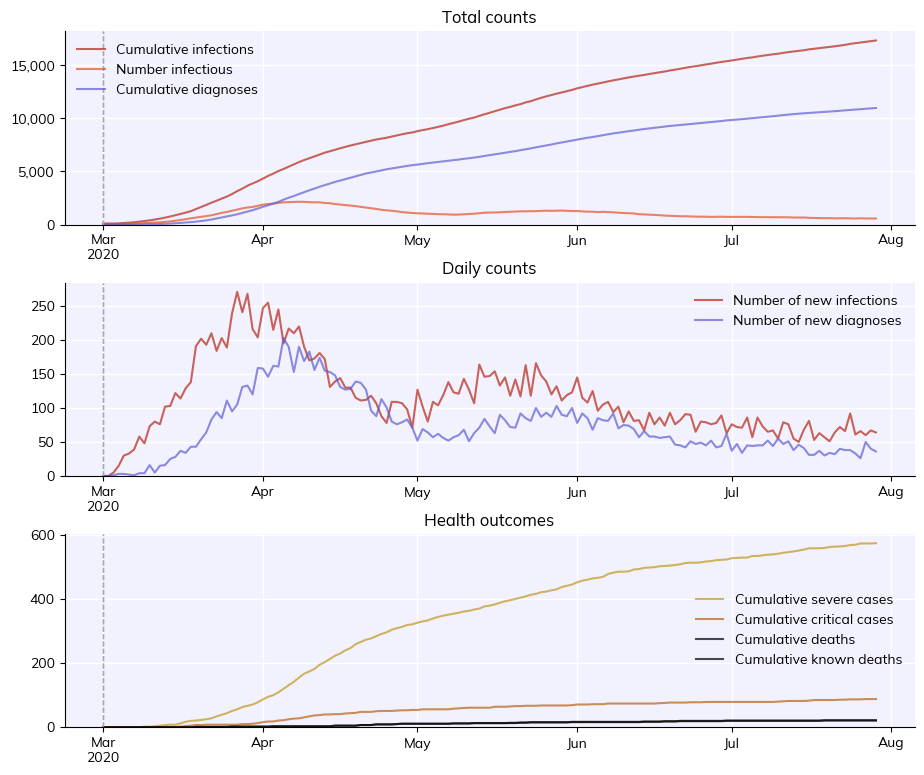

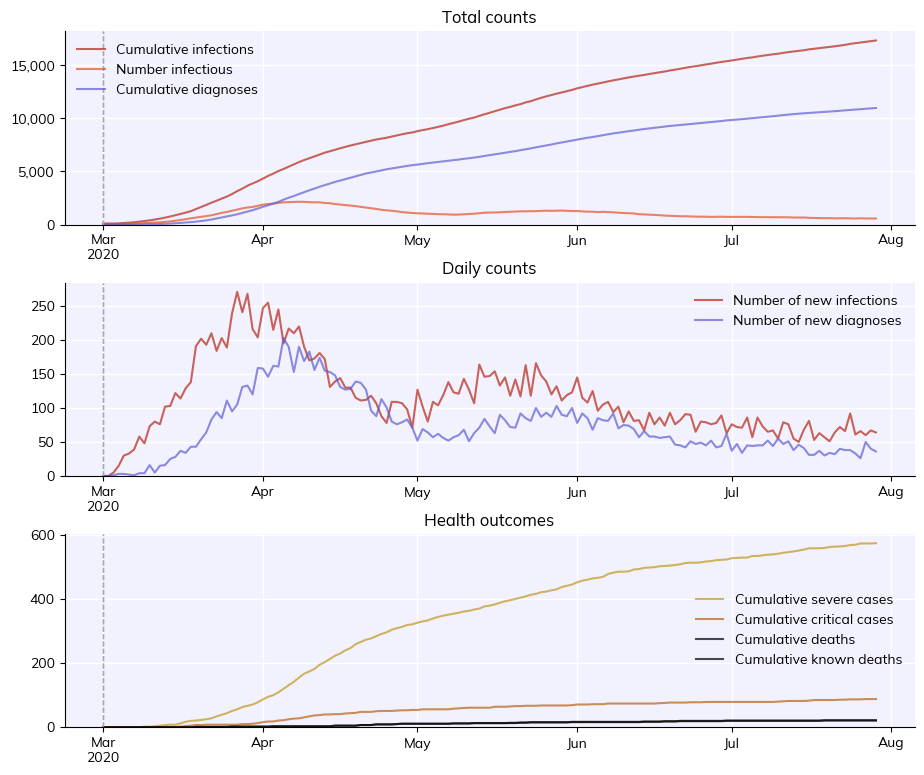

In [12]:
sim = cv.Sim(pop_size = 50e3, pop_infected = 100, pop_type = 'hybrid', beta = 0.023, interventions = [tp,ct,vn,vb],n_days=150)
sim.run().plot()

In [19]:
def rand_vaccinate(sim):
  ppl     = sim.people
  pop     = len(ppl)
  ten     = np.logical_and(ppl.age > 10, ppl.age <= 20)
  twenty  = np.logical_and(ppl.age > 20, ppl.age <= 30)
  thirty  = np.logical_and(ppl.age > 30, ppl.age <= 40)
  fourty  = np.logical_and(ppl.age > 40, ppl.age <= 50)
  fifty   = np.logical_and(ppl.age > 50, ppl.age <= 60)
  sixty   = np.logical_and(ppl.age > 60, ppl.age <= 70)
  seventy = np.logical_and(ppl.age > 70, ppl.age <= 80)
  eighty  = ppl.age > 80
  male    = ppl.sex == 1
  female  = ppl.sex == 0

  num_symp     = np.sum(ppl.symptomatic)
  num_severe   = np.sum(ppl.severe)
  num_critical = np.sum(ppl.critical)
  num_dead     = np.sum(ppl.dead)

  norms   = np.random.normal(loc=1,scale=0.5,size=len(ppl))
  x       = (num_severe + num_critical + num_dead + num_symp)

  inds = np.array(sim.people.uid)

  sexs = np.array(sim.people.sex)
  sexs = np.where(male,1.41,sexs)
  sexs = np.where(female,1,sexs)

  ages = np.array(sim.people.age)
  ages = np.where(ten,0.55,ages)
  ages = np.where(twenty,0.6,ages)
  ages = np.where(thirty,0.65,ages)
  ages = np.where(fourty,0.7,ages)
  ages = np.where(fifty,0.75,ages)
  ages = np.where(sixty,0.80,ages)
  ages = np.where(seventy,0.85,ages)
  ages = np.where(eighty,0.9,ages)


  vals = sexs*((np.exp((0.0001)+(norms)*(x/pop)-(0.0001*sim.t))/(1+np.exp((0.0001)+(norms)*(x/pop)-(0.0001*sim.t))))-0.5)
  vals = np.clip(vals,0.0,0.5)

  vaccinated = np.random.binomial(1,p=vals,size=len(vals))
  global vacc_num
  vacc_num   = np.sum(vaccinated)
  global vacc_inds
  vacc_inds  = np.where(vaccinated)[0]
  return vacc_num
def vacc_subtarget(sim):
  vacc_dict  = dict(inds=vacc_inds,vals=1)
  return vacc_dict

  


In [14]:
trace_prob = dict(h=1.0, s=0.5, w=0.5, c=0.3)
ct = cv.contact_tracing(trace_probs=trace_prob)
tp = cv.test_prob(symp_prob=0.1,asymp_prob=0.001,symp_quar_prob=0.3,asymp_quar_prob=0.3,quar_policy='daily')
rv = cv.vaccinate_num(vaccine='pfizer',num_doses=rand_vaccinate,booster=False,subtarget=vacc_subtarget) # vaccine
rb = cv.vaccinate_num(vaccine='pfizer',num_doses=rand_vaccinate,booster=True,subtarget=vacc_subtarget) # booster

Initializing sim with 50000 people for 150 days
  Running 2020-03-01 ( 0/150) (0.45 s)  ———————————————————— 1%
  Running 2020-03-11 (10/150) (0.75 s)  •——————————————————— 7%
  Running 2020-03-21 (20/150) (1.16 s)  ••—————————————————— 14%
  Running 2020-03-31 (30/150) (1.62 s)  ••••———————————————— 21%
  Running 2020-04-10 (40/150) (2.12 s)  •••••——————————————— 27%
  Running 2020-04-20 (50/150) (2.63 s)  ••••••—————————————— 34%
  Running 2020-04-30 (60/150) (3.11 s)  ••••••••———————————— 40%
  Running 2020-05-10 (70/150) (3.56 s)  •••••••••——————————— 47%
  Running 2020-05-20 (80/150) (4.08 s)  ••••••••••—————————— 54%
  Running 2020-05-30 (90/150) (4.55 s)  ••••••••••••———————— 60%
  Running 2020-06-09 (100/150) (5.04 s)  •••••••••••••——————— 67%
  Running 2020-06-19 (110/150) (5.53 s)  ••••••••••••••—————— 74%
  Running 2020-06-29 (120/150) (6.01 s)  ••••••••••••••••———— 80%
  Running 2020-07-09 (130/150) (6.47 s)  •••••••••••••••••——— 87%
  Running 2020-07-19 (140/150) (6.91 s) 

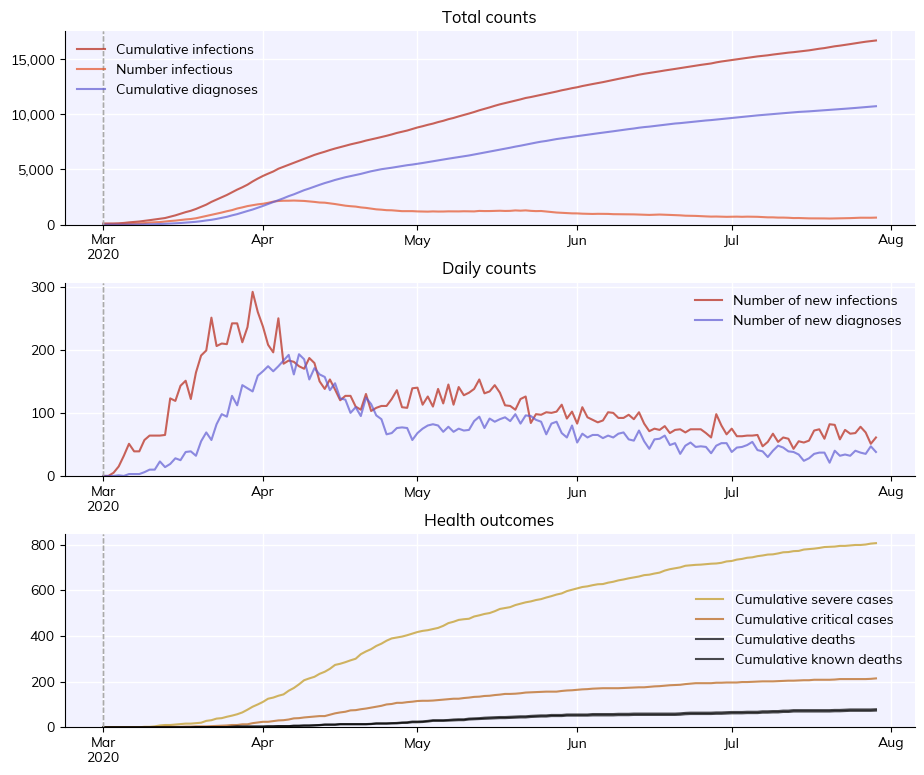

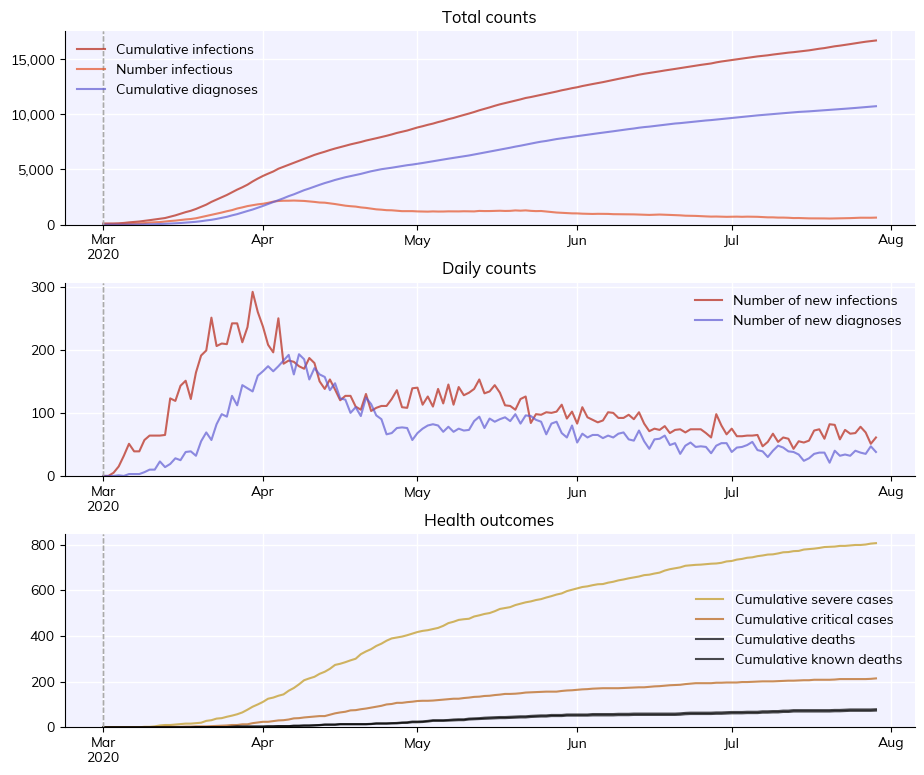

In [15]:
sim = cv.Sim(pop_size = 50e3, pop_infected = 100, pop_type = 'hybrid', beta = 0.023, interventions = [tp,ct,rv,rb],n_days=150)
sim.run().plot()

In [16]:
def uni_vaccinate(sim):
  ppl     = sim.people
  pop     = len(ppl)
  ten     = np.logical_and(ppl.age > 10, ppl.age <= 20)
  twenty  = np.logical_and(ppl.age > 20, ppl.age <= 30)
  thirty  = np.logical_and(ppl.age > 30, ppl.age <= 40)
  fourty  = np.logical_and(ppl.age > 40, ppl.age <= 50)
  fifty   = np.logical_and(ppl.age > 50, ppl.age <= 60)
  sixty   = np.logical_and(ppl.age > 60, ppl.age <= 70)
  seventy = np.logical_and(ppl.age > 70, ppl.age <= 80)
  eighty  = ppl.age > 80
  male    = ppl.sex == 1
  female  = ppl.sex == 0

  num_symp     = np.sum(ppl.symptomatic)
  num_severe   = np.sum(ppl.severe)
  num_critical = np.sum(ppl.critical)
  num_dead     = np.sum(ppl.dead)
  
  x            = (num_severe + num_critical + num_dead + num_symp)

  inds = np.array(sim.people.uid)

  sexs = np.array(sim.people.sex)
  sexs = np.where(male,1.41,sexs)
  sexs = np.where(female,1,sexs)

  ages = np.array(sim.people.age)
  ages = np.where(ten,0.55,ages)
  ages = np.where(twenty,0.6,ages)
  ages = np.where(thirty,0.65,ages)
  ages = np.where(fourty,0.7,ages)
  ages = np.where(fifty,0.75,ages)
  ages = np.where(sixty,0.80,ages)
  ages = np.where(seventy,0.85,ages)
  ages = np.where(eighty,0.9,ages)


  vals = sexs*((np.exp((0.0001)+(1.25)*(x/pop)-(0.0001*sim.t))/(1+np.exp((0.0001)+(1.25)*(x/pop)-(0.0001*sim.t))))-0.5)
  vals = np.clip(vals,0.0,0.5)

  vaccinated = np.random.binomial(1,p=vals,size=len(vals))
  global vacc_num
  vacc_num   = np.sum(vaccinated)
  global vacc_inds
  vacc_inds  = np.where(vaccinated)[0]
  return vacc_num
def vacc_subtarget(sim):
  vacc_dict  = dict(inds=vacc_inds,vals=1)
  return vacc_dict

  


In [17]:
trace_prob = dict(h=1.0, s=0.5, w=0.5, c=0.3)
ct = cv.contact_tracing(trace_probs=trace_prob)
tp = cv.test_prob(symp_prob=0.1,asymp_prob=0.001,symp_quar_prob=0.3,asymp_quar_prob=0.3,quar_policy='daily')
uv = cv.vaccinate_num(vaccine='pfizer',num_doses=uni_vaccinate,booster=False,subtarget=vacc_subtarget,sequence='age')
ub = cv.vaccinate_num(vaccine='pfizer',num_doses=uni_vaccinate,booster=True,subtarget=vacc_subtarget,sequence='age')

Initializing sim with 50000 people for 150 days
  Running 2020-03-01 ( 0/150) (0.64 s)  ———————————————————— 1%
  Running 2020-03-11 (10/150) (0.94 s)  •——————————————————— 7%
  Running 2020-03-21 (20/150) (1.34 s)  ••—————————————————— 14%
  Running 2020-03-31 (30/150) (1.76 s)  ••••———————————————— 21%
  Running 2020-04-10 (40/150) (2.22 s)  •••••——————————————— 27%
  Running 2020-04-20 (50/150) (2.68 s)  ••••••—————————————— 34%
  Running 2020-04-30 (60/150) (3.20 s)  ••••••••———————————— 40%
  Running 2020-05-10 (70/150) (3.65 s)  •••••••••——————————— 47%
  Running 2020-05-20 (80/150) (4.08 s)  ••••••••••—————————— 54%
  Running 2020-05-30 (90/150) (4.48 s)  ••••••••••••———————— 60%
  Running 2020-06-09 (100/150) (4.91 s)  •••••••••••••——————— 67%
  Running 2020-06-19 (110/150) (5.33 s)  ••••••••••••••—————— 74%
  Running 2020-06-29 (120/150) (5.77 s)  ••••••••••••••••———— 80%
  Running 2020-07-09 (130/150) (6.21 s)  •••••••••••••••••——— 87%
  Running 2020-07-19 (140/150) (6.65 s) 

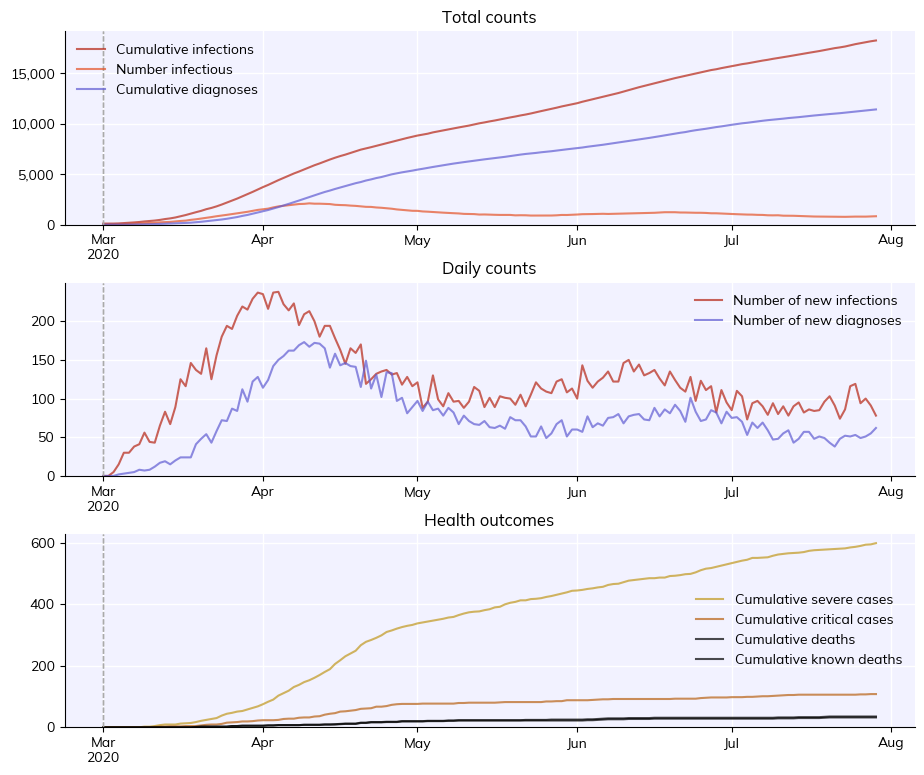

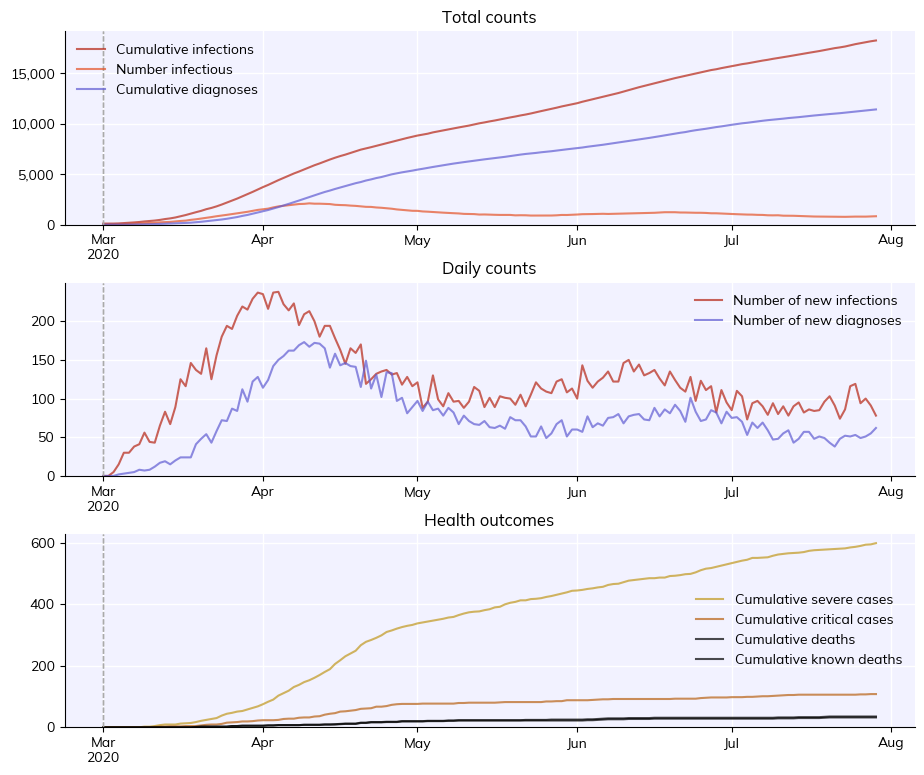

In [18]:
sim = cv.Sim(pop_size = 50e3, pop_infected = 100, pop_type = 'hybrid', beta = 0.023, interventions = [tp,ct,uv,ub],n_days=150)
sim.run().plot()